<a href="https://colab.research.google.com/github/AKSHAYA1006/IMDB-movie-review/blob/main/IMDB_movie_review_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
data=pd.read_csv('IMDB Dataset.csv')
data.dropna(inplace=True)
def clean_review(review):
  str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
  return str

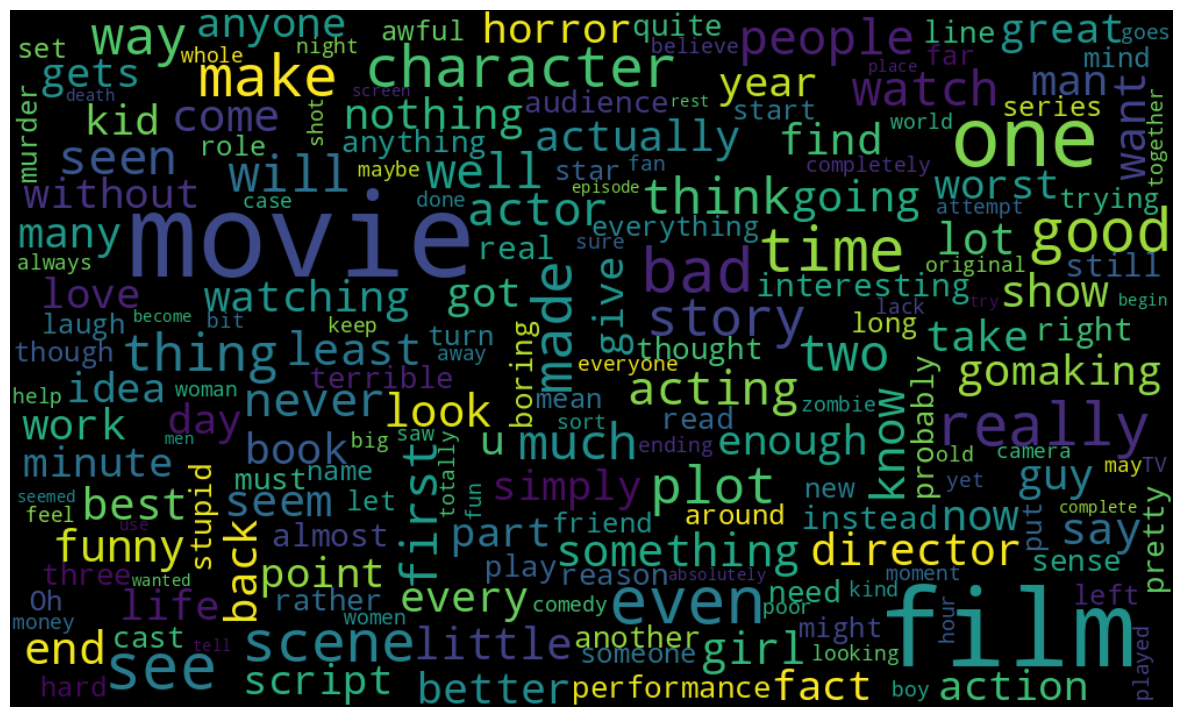

In [ ]:
from wordcloud import WordCloud
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].astype(str))
wordcloud = WordCloud(height= 600,width=1000,max_font_size=100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

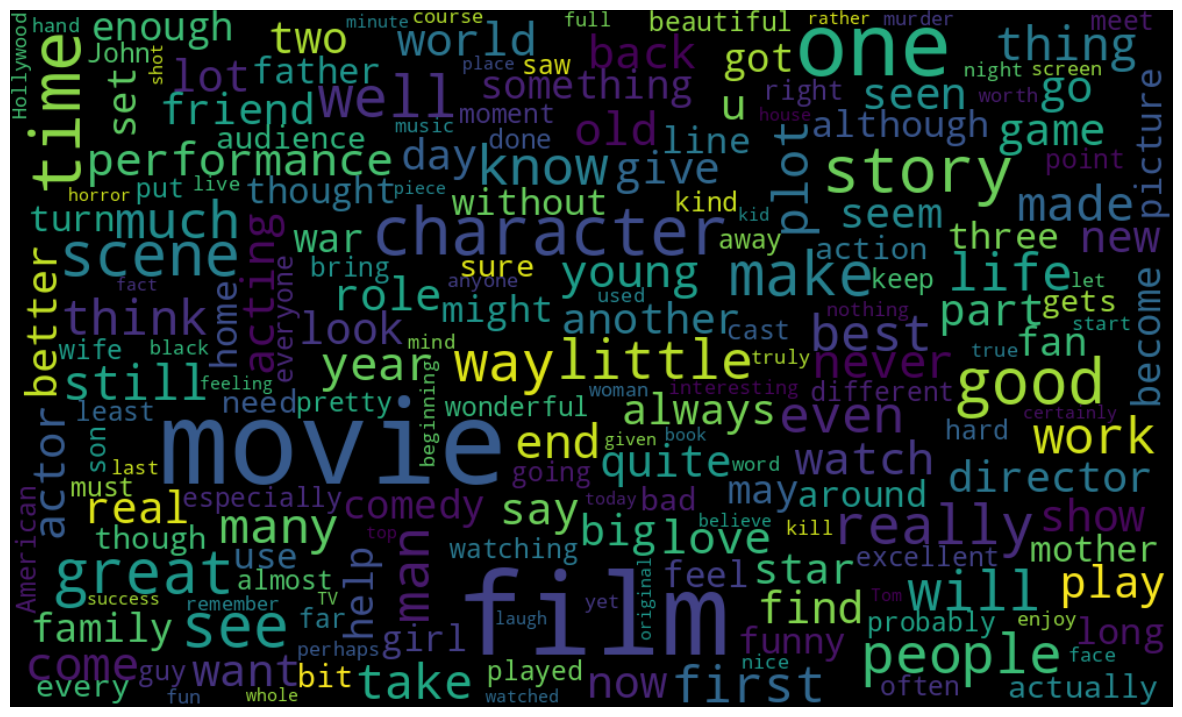

In [ ]:
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'positive'].astype(str))
wordcloud = WordCloud(height= 600,width=1000,max_font_size=100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)


In [ ]:
reviews = cv.fit_transform(data['review']).toarray()

In [ ]:
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])

/tmp/ipython-input-30-3911524901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
0,263
1,237


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
model=LogisticRegression()

In [ ]:
reviews_train,reviews_test,sentiment_train,sentiment_test=train_test_split(reviews,data['sentiment'],test_size=0.2)


Logistic Regression Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        56
           1       0.70      0.64      0.67        44

    accuracy                           0.72       100
   macro avg       0.72      0.71      0.71       100
weighted avg       0.72      0.72      0.72       100



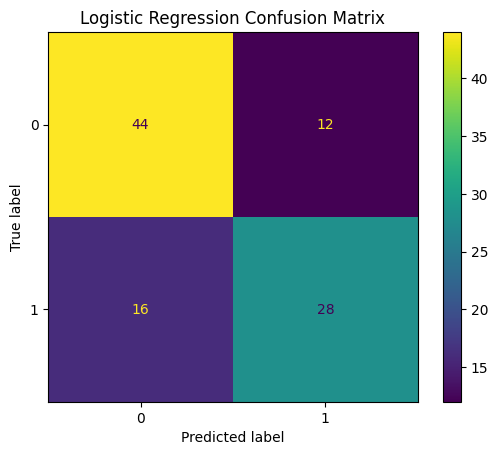


Decision Tree Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.72      0.64      0.68        56
           1       0.60      0.68      0.64        44

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.67      0.66      0.66       100



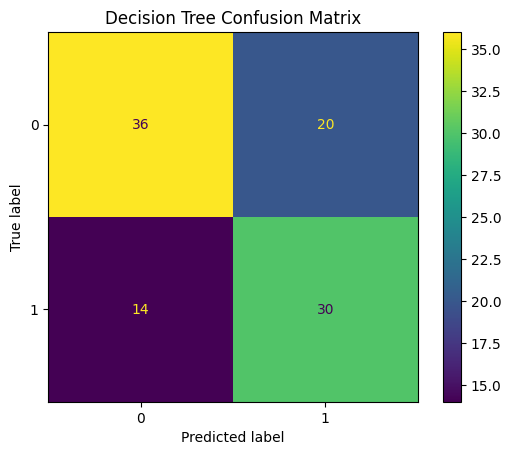


Random Forest Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.72      0.91      0.80        56
           1       0.83      0.55      0.66        44

    accuracy                           0.75       100
   macro avg       0.77      0.73      0.73       100
weighted avg       0.77      0.75      0.74       100



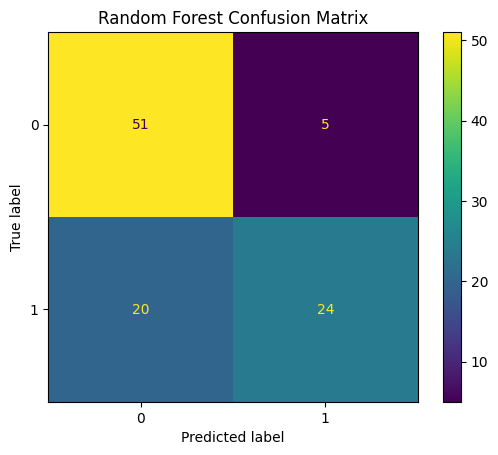


K-Nearest Neighbors Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        56
           1       0.60      0.55      0.57        44

    accuracy                           0.64       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.64      0.64      0.64       100



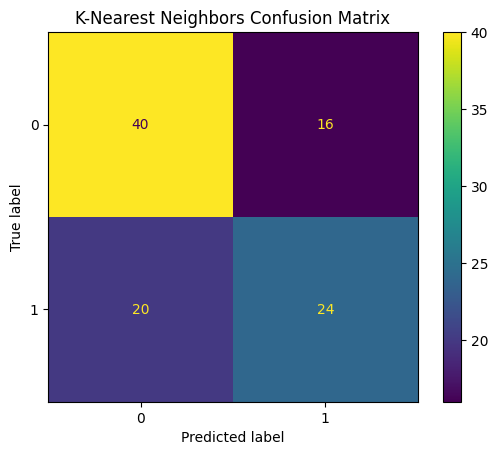


Support Vector Machine Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        56
           1       0.74      0.73      0.74        44

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



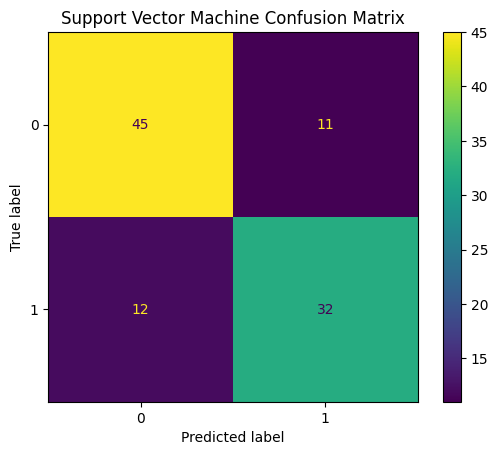


✅ Best Model: Support Vector Machine with Accuracy: 0.7700


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', probability=True)
}

# For comparison
model_accuracies = {}
best_model = None
best_model_name = ""
best_accuracy = 0

# Train and evaluate
for name, model in models.items():
    model.fit(reviews_train, sentiment_train)
    preds = model.predict(reviews_test)
    acc = accuracy_score(sentiment_test, preds)
    model_accuracies[name] = acc

    print(f"\n{name} Accuracy: {acc}")
    print(classification_report(sentiment_test, preds))

    cm = confusion_matrix(sentiment_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

print(f"\n✅ Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

# Save only the best model and vectorizer
pickle.dump(best_model, open('model.pkl', 'wb'))
pickle.dump(cv, open('vectorizer.pkl', 'wb'))


/tmp/ipython-input-36-3229658010.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_accuracies.keys()), y=list(sorted_accuracies.values()), palette="viridis")


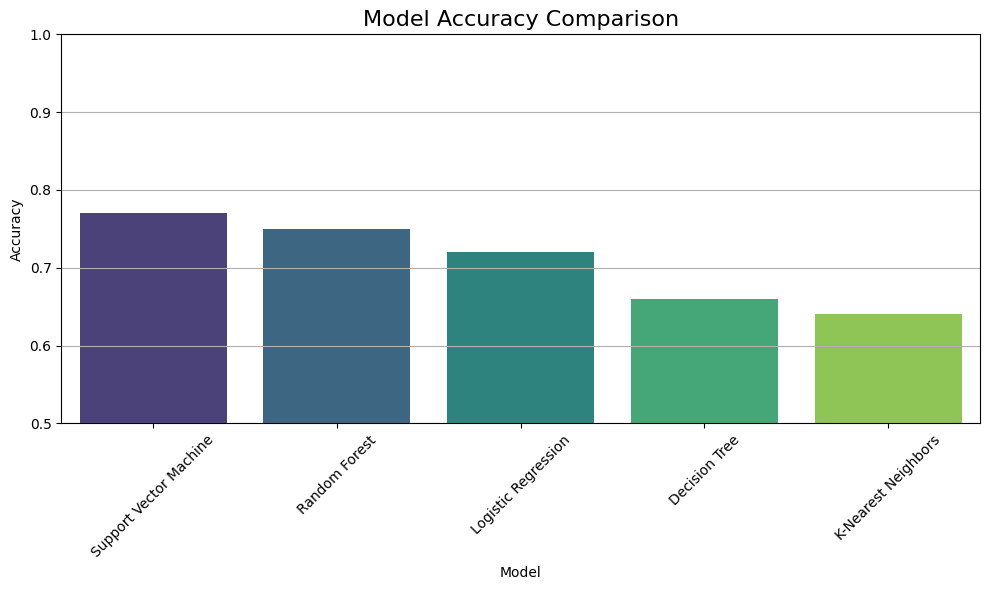

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Just to make sure values are sorted from highest to lowest
sorted_accuracies = dict(sorted(model_accuracies.items(), key=lambda item: item[1], reverse=True))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_accuracies.keys()), y=list(sorted_accuracies.values()), palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
%%writefile app.py
import pickle as pk
import streamlit as st
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained model and vectorizer
model = pk.load(open('model.pkl', 'rb'))
vectorizer = pk.load(open('vectorizer.pkl', 'rb'))

st.title("Movie Review Sentiment Analysis")

# Get user input
review = st.text_input('Enter Movie Review')

if st.button('Predict'):
    # Transform the input review
    review_vectorized = vectorizer.transform([review]).toarray()

    # Make a prediction
    result = model.predict(review_vectorized)

    # Display the result
    sentiment = "Positive Review" if result[0] == 1 else "Negative Review"
    st.write(sentiment)


Overwriting app.py


In [ ]:
import pickle
pickle.dump(best_model, open("model.pkl", "wb"))
pickle.dump(cv, open("vectorizer.pkl", "wb"))


In [ ]:
! wget -q -O - ipv4.icanhazip.com

35.229.35.98


In [ ]:
!streamlit run app.py &>/content/logs.txt &
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://swift-parrots-live.loca.lt
